In [1]:
#Import of necessary libraries to work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/self_empl_cleared.csv')
df

,id,self_employment_type,branch,person_characteristics,gender,period,self_empl_persons,avg_personal_income,avg_self_empl_income
0,14424,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2011,1.1,31.6,18.1
1,14425,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2012,1.1,33.0,18.8
2,14426,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2013,1.2,34.8,18.9
3,14427,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2014,1.2,29.9,18.0
4,14428,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2015,1.2,28.2,17.2
...,...,...,...,...,...,...,...,...,...
95465,643183,5th_category_group,Unknown,1021150,Female,2016,5.1,12.8,7.5
95466,643184,5th_category_group,Unknown,1021150,Female,2017,5.0,13.7,7.9
95467,643185,5th_category_group,Unknown,1021150,Female,2018,5.2,14.0,8.2
95468,643186,5th_category_group,Unknown,1021150,Female,2019,3.5,15.1,10.0


In [3]:
df.shape

(95470, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95470 entries, 0 to 95469
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      95470 non-null  int64  
 1   self_employment_type    95470 non-null  object 
 2   branch                  95470 non-null  object 
 3   person_characteristics  95470 non-null  int64  
 4   gender                  95470 non-null  object 
 5   period                  95470 non-null  int64  
 6   self_empl_persons       95470 non-null  float64
 7   avg_personal_income     95470 non-null  float64
 8   avg_self_empl_income    95470 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


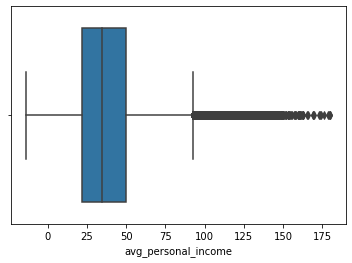

In [5]:
sns.boxplot(df['avg_personal_income'], data = df)
plt.show()

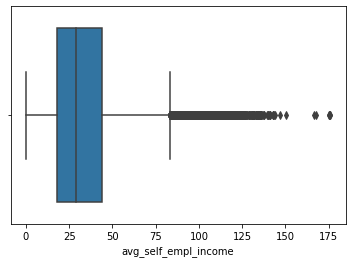

In [6]:
sns.boxplot(df['avg_self_empl_income'], data = df)
plt.show()

In [10]:
iqr_2= np.nanpercentile(df['avg_self_empl_income'],75) - np.nanpercentile(df['avg_self_empl_income'],25)
upper_limit_2 = np.nanpercentile(df['avg_self_empl_income'],75) + 1.5*iqr_2
extraordinary_points_3 = df[df['avg_self_empl_income'] > upper_limit_2] 

# This checks the number of points that will be removed
print('avg_self_empl_income:', len(extraordinary_points_3))

avg_self_empl_income: 1756


In [11]:
iqr_1= np.nanpercentile(df['avg_personal_income'],75) - np.nanpercentile(df['avg_personal_income'],25)
upper_limit_1 = np.nanpercentile(df['avg_personal_income'],75) + 1.5*iqr_1
extraordinary_points_1 = df[df['avg_personal_income'] > upper_limit_1] 

# This checks the number of points that will be removed
print('avg_personal_income:', len(extraordinary_points_1))

avg_personal_income: 2371


In [13]:
df = df[df['avg_personal_income'] < upper_limit_1]
df = df[df['avg_self_empl_income'] < upper_limit_2 ]

In [14]:
df.head(3)

,id,self_employment_type,branch,person_characteristics,gender,period,self_empl_persons,avg_personal_income,avg_self_empl_income
0,14424,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2011,1.1,31.6,18.1
1,14425,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2012,1.1,33.0,18.8
2,14426,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2013,1.2,34.8,18.9


In [15]:
type_a = ['21600', '41500', '53500', '53700', '53800', '53900', '53925']
df_age = df[df['person_characteristics'].isin(type_a) & df['id']]
df_age = df_age.rename(columns = {'person_characteristics':'age'})
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8259 entries, 1 to 94962
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8259 non-null   int64  
 1   self_employment_type  8259 non-null   object 
 2   branch                8259 non-null   object 
 3   age                   8259 non-null   int64  
 4   gender                8259 non-null   object 
 5   period                8259 non-null   int64  
 6   self_empl_persons     8259 non-null   float64
 7   avg_personal_income   8259 non-null   float64
 8   avg_self_empl_income  8259 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 645.2+ KB


In [17]:
df_age_clean = df_age.drop(columns = ['id', 'avg_personal_income'])

df_age_clean.head()

,self_employment_type,branch,age,gender,period,self_empl_persons,avg_self_empl_income
1,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2012,1.1,18.8
3,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2014,1.2,18.0
5,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2016,1.3,18.4
7,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2018,1.5,21.0
10,1st_category_group,"Agriculture, forestry and fishing",21600,Female,2012,0.2,20.5


In [18]:
df_age_clean = df_age_clean.reset_index(drop=True)

In [19]:
correlation_matrix =df_age_clean.corr()

correlation_matrix

,age,period,self_empl_persons,avg_self_empl_income
age,1.000000,0.025494,0.183384,0.152375
period,0.025494,1.000000,0.155842,0.126107
self_empl_persons,0.183384,0.155842,1.000000,0.090813
avg_self_empl_income,0.152375,0.126107,0.090813,1.000000


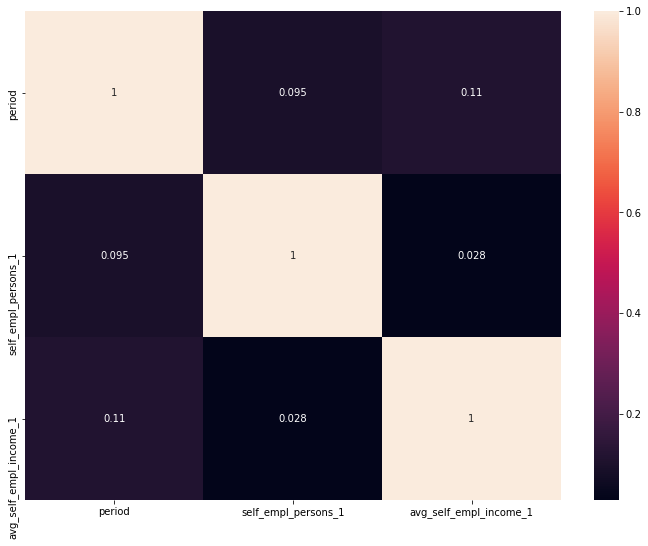

In [15]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

y = df_age_clean['avg_self_empl_income']
X = df_age_clean.drop(['avg_self_empl_income'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [21]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
#x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized = pd.DataFrame(x_normalized)
x_normalized

(8259, 3)


,0,1,2
0,0.0,0.00,0.022222
1,0.0,0.25,0.024444
2,0.0,0.50,0.026667
3,0.0,0.75,0.031111
4,0.0,0.00,0.002222
...,...,...,...
8254,1.0,0.75,0.013333
8255,1.0,0.00,0.008889
8256,1.0,0.25,0.008889
8257,1.0,0.50,0.006667


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
#print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
#print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

,2nd_category_group,3rd_category_group,4th_category_group,5th_category_group,"Agriculture, forestry and fishing",Construction,"Culture, sports and recreation",Education,Financial institutions,Health and social work activities,...,Other service activities,Other specialised business services,Public administration and services,Renting and other business support,"Renting, buying, selling real estates",Transportation and storage,Unknown,Water supply and waste management,Wholesale and retail trade,Male
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.shape

(8259, 25)

In [24]:
def model(X, y):
    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.neural_network import MLPRegressor
    
    models = { 'LinearRegression': LinearRegression(), 'KNeighborsRegressor': KNeighborsRegressor(n_neighbors = 5), 
              'MLPRegressor': MLPRegressor(random_state=1, max_iter=500)}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

    for k,v in models.items(): #"items()" method of dict returns keys and values
        v.fit(X_test, y_test)
        print(k + ' test score:', v.score(X_test, y_test))

In [25]:
y_train = df_age_clean['avg_self_empl_income']
X_train = X

In [26]:
model(X_train, y_train)

LinearRegression test score: 0.673285302716605
KNeighborsRegressor test score: 0.8422378053987434
MLPRegressor test score: 0.7999824769681445


In [27]:
type_b = ['1012600', '2012655', '2012657']
df_background = df[df['person_characteristics'].isin(type_b)]
df_background = df_background.rename(columns = {'person_characteristics':'background'}) 

In [29]:
df_background_clean = df_background.drop(columns = ['id', 'avg_personal_income'])
df_background_clean = df_background_clean.reset_index(drop=True)

In [30]:
y = df_background_clean['avg_self_empl_income']
X = df_background_clean.drop(['avg_self_empl_income'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [31]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized = pd.DataFrame(x_normalized)
x_normalized

(9257, 3)


,0,1,2
0,0.0,0.000000,0.476190
1,0.0,0.111111,0.468672
2,0.0,0.222222,0.466165
3,0.0,0.333333,0.461988
4,0.0,0.444444,0.459482
...,...,...,...
9252,1.0,0.444444,0.022556
9253,1.0,0.555556,0.018379
9254,1.0,0.666667,0.019215
9255,1.0,0.777778,0.018379


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

,2nd_category_group,3rd_category_group,4th_category_group,5th_category_group,"Agriculture, forestry and fishing",Construction,"Culture, sports and recreation",Education,Energy supply,Financial institutions,...,Other service activities,Other specialised business services,Public administration and services,Renting and other business support,"Renting, buying, selling real estates",Transportation and storage,Unknown,Water supply and waste management,Wholesale and retail trade,Male
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
X2 = pd.concat([x_normalized, onehot_encoded], axis=1)
X2.shape

(9257, 27)

In [34]:
y_train = df_background_clean['avg_self_empl_income']
X_train = X2

In [35]:
model(X_train, y_train)

LinearRegression test score: 0.7156616512893696
KNeighborsRegressor test score: 0.8617372576011795
MLPRegressor test score: 0.8264599668605468


In [36]:
type_p = ['1016411', '1016400', '1016410', '1016420', '1016460', '1016520']
df_position_in_household = df[df['person_characteristics'].isin(type_p)]
df_position_in_household = df_position_in_household.rename(columns = {'person_characteristics':'position_in_household'})

In [39]:
df_position_in_household_clean = df_position_in_household.drop(columns = ['id', 'avg_personal_income'])
df_position_in_household_clean = df_position_in_household_clean.reset_index(drop=True)

In [40]:
y = df_position_in_household_clean['avg_self_empl_income']
X = df_position_in_household_clean.drop(['avg_self_empl_income'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [41]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized = pd.DataFrame(x_normalized)
x_normalized

(16588, 3)


,0,1,2
0,0.091667,0.000000,0.318358
1,0.091667,0.111111,0.312936
2,0.091667,0.222222,0.314485
3,0.091667,0.333333,0.309063
4,0.091667,0.444444,0.302091
...,...,...,...
16583,1.000000,0.444444,0.002324
16584,1.000000,0.555556,0.001549
16585,1.000000,0.666667,0.001549
16586,1.000000,0.777778,0.002324


In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

,2nd_category_group,3rd_category_group,4th_category_group,5th_category_group,"Agriculture, forestry and fishing",Construction,"Culture, sports and recreation",Education,Energy supply,Financial institutions,...,Other service activities,Other specialised business services,Public administration and services,Renting and other business support,"Renting, buying, selling real estates",Transportation and storage,Unknown,Water supply and waste management,Wholesale and retail trade,Male
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
X3 = pd.concat([x_normalized, onehot_encoded], axis=1)
X3.shape

(16588, 27)

In [45]:
y_train = df_position_in_household_clean['avg_self_empl_income']
X_train = X3

In [46]:
model(X_train, y_train)

LinearRegression test score: 0.5826612770121692
KNeighborsRegressor test score: 0.7738573869257677
MLPRegressor test score: 0.8847257632099876
